In [66]:
# read from c:/tmp2/20241007_1131_gps_data.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from datetime import timedelta

In [67]:
# read from c:/tmp2/20241007_1131_gps_data.csv
df = pd.read_csv('c:/tmp2/20241007_1131_gps_data.csv')
df.dtypes

latitud         float64
longitud        float64
velocidad       float64
timestamp        object
distancia       float64
clase           float64
probabilidad    float64
dtype: object

In [68]:
df.head()

,latitud,longitud,velocidad,timestamp,distancia,clase,probabilidad
0,-17.404345,-66.157077,2.222822,2024-10-07 11:31:41,0.000000,NaN,NaN
1,-17.404273,-66.156992,8.021845,2024-10-07 11:31:46,11.973452,NaN,NaN
2,-17.404542,-66.156900,24.298496,2024-10-07 11:31:50,31.240425,NaN,NaN
3,-17.404512,-66.156886,1.900256,2024-10-07 11:31:55,3.565586,NaN,NaN
4,-17.404444,-66.156931,0.699240,2024-10-07 11:32:00,8.961103,NaN,NaN


In [74]:
# convert timestamp to datetime
# df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df.set_index(pd.DatetimeIndex(df['timestamp'], freq='min'), inplace=True)  # set index to timestamp
df.head(50)

ValueError: Inferred frequency None from passed values does not conform to passed frequency min

In [65]:
# resample to 1 second
df = df.resample('1s').mean()
df.head()

TypeError: agg function failed [how->mean,dtype->object]

In [62]:
df['velocidad'].describe()

count    569.000000
mean       8.340561
std       10.525098
min        0.000385
25%        0.931171
50%        2.579489
75%       13.875342
max       44.546490
Name: velocidad, dtype: float64

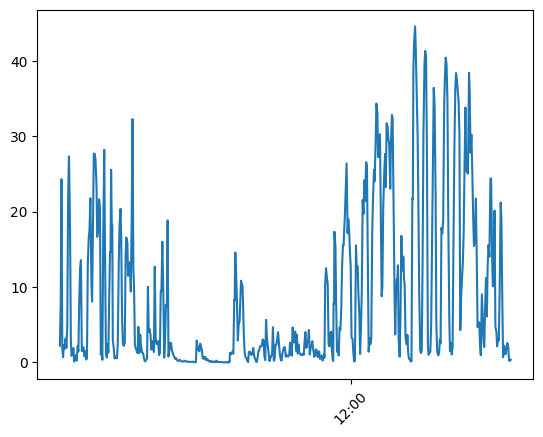

In [61]:
# plot timestamp vs velocidad
fig, ax = plt.subplots()
ax.plot(df.index, df['velocidad'])
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.show()


In [46]:
df.head()

,latitud,longitud,velocidad,timestamp,distancia,clase,probabilidad
timestamp,,,,,,,
2024-10-07 11:31:41,-17.404345,-66.157077,2.222822,2024-10-07 11:31:41,0.000000,NaN,NaN
2024-10-07 11:31:46,-17.404273,-66.156992,8.021845,2024-10-07 11:31:46,11.973452,NaN,NaN
2024-10-07 11:31:50,-17.404542,-66.156900,24.298496,2024-10-07 11:31:50,31.240425,NaN,NaN
2024-10-07 11:31:55,-17.404512,-66.156886,1.900256,2024-10-07 11:31:55,3.565586,NaN,NaN
2024-10-07 11:32:00,-17.404444,-66.156931,0.699240,2024-10-07 11:32:00,8.961103,NaN,NaN


In [10]:
# order by timestamp
df = df.sort_values(by='timestamp')

df['timestamp'] = df['timestamp'] // 2
df['diff'] = df['timestamp'].diff()
df['diff'] = df['diff'].dt.total_seconds()
df['diff'].value_counts()


TypeError: cannot perform __floordiv__ with this index type: DatetimeArray

In [3]:
df['diff'] = df['timestamp'].diff()


In [4]:
df['diff'] = df['diff'].dt.total_seconds()


In [5]:
df['diff'].value_counts()


diff
5.0    323
4.0    106
6.0     70
3.0     36
2.0     33
Name: count, dtype: int64

In [6]:
df.head(10)

,latitud,longitud,velocidad,timestamp,distancia,clase,probabilidad,Unnamed: 7,diff
0,-17.404345,-66.157077,2.222822,2024-10-07 11:31:41,0.000000,NaN,NaN,NaN,NaN
1,-17.404273,-66.156992,8.021845,2024-10-07 11:31:46,11.973452,NaN,NaN,NaN,5.0
2,-17.404542,-66.156900,24.298496,2024-10-07 11:31:50,31.240425,NaN,NaN,NaN,4.0
3,-17.404512,-66.156886,1.900256,2024-10-07 11:31:55,3.565586,NaN,NaN,NaN,5.0
4,-17.404444,-66.156931,0.699240,2024-10-07 11:32:00,8.961103,NaN,NaN,NaN,5.0
5,-17.404408,-66.156982,2.333975,2024-10-07 11:32:04,6.790557,NaN,NaN,NaN,4.0
6,-17.404419,-66.157048,1.816539,2024-10-07 11:32:09,7.110466,NaN,NaN,NaN,5.0
7,-17.404343,-66.157080,3.160414,2024-10-07 11:32:14,9.111945,NaN,NaN,NaN,5.0
8,-17.404362,-66.157076,1.938938,2024-10-07 11:32:19,2.205971,NaN,NaN,NaN,5.0
9,-17.404326,-66.157041,4.701449,2024-10-07 11:32:24,5.425342,NaN,NaN,NaN,5.0


In [7]:
df['diff'].describe()

count    568.000000
mean       4.635563
std        0.977310
min        2.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        6.000000
Name: diff, dtype: float64

In [8]:
df['timestamp'] = df['timestamp'] // 2
df['diff'] = df['timestamp'].diff()
df['diff'] = df['diff'].dt.total_seconds()
df['diff'].value_counts()

TypeError: cannot perform __floordiv__ with this index type: DatetimeArray